In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

In [2]:
from datetime import datetime
today=datetime.today().strftime('%Y-%m-%d')
yesterday=(datetime.today()+pd.DateOffset(-1,'D')).strftime('%Y-%m-%d')
yesterday,today='2023-10-13', '2023-10-14'
yesterday,today

('2023-10-13', '2023-10-14')

In [3]:
m6u=pd.read_csv('M6_UniverseV2b.csv')

In [4]:
for i in m6u.columns[np.array([1,4,5])]:
    print(m6u[i].unique())

['Stock' 'ETF']
['Health Care' 'Information Technology' 'Utilities' 'Financials'
 'Industrials' 'Consumer Discretionary' 'Real Estate' 'Materials'
 'Consumer Staples' 'Communication Services' 'Energy' 'Equities'
 'Fixed Income' 'Commodities' 'Volatility']
['Pharmaceuticals' 'IT Consulting & Other Services' 'Electric Utilities'
 'Multi-line Insurance' 'Building Products' 'Semiconductor Equipment'
 'Asset Management & Custody Banks' 'Internet & Direct Marketing Retail'
 'Residential REITs' 'Paper Packaging' 'Consumer Finance'
 'Health Care Equipment' 'Distillers & Vintners'
 'Health Care Distributors' 'Data Processing & Outsourced Services'
 'Technology Distributors' 'Specialty Chemicals' 'Cable & Satellite'
 'Managed Health Care' 'Multi-Utilities'
 'Oil & Gas Exploration & Production' 'Diversified Support Services'
 'Casinos & Gaming' 'General Merchandise Stores' 'Restaurants'
 'Industrial REITs' 'Interactive Media & Services' 'Industrial Machinery'
 'Specialty Stores' 'Property & Casua

In [5]:
sdate='2000-01-01'
edate='2030-01-01'
edate=today

In [6]:
filename='data/y_m6all_'+yesterday+'.csv.gz'
if not os.path.isfile(filename):
    df=yf.download(list(m6u.symbol),sdate,edate)
    filename='data/y_m6all_'+str(df.index[-1])[:10]+'.csv.gz'
    if not os.path.isfile(filename):
        df.to_csv(filename)

In [7]:
df=pd.read_csv(filename, header=[0,1], index_col=0, low_memory=False, parse_dates=True)[:today]

In [8]:
#df=df.dropna(axis = 0, how = 'all')
df2y=df.fillna(method='ffill')['Adj Close']

In [9]:
df2y['DRE']=pd.read_csv('data/DRE.csv',index_col=0, low_memory=False, parse_dates=True)['adjClose'][:today]

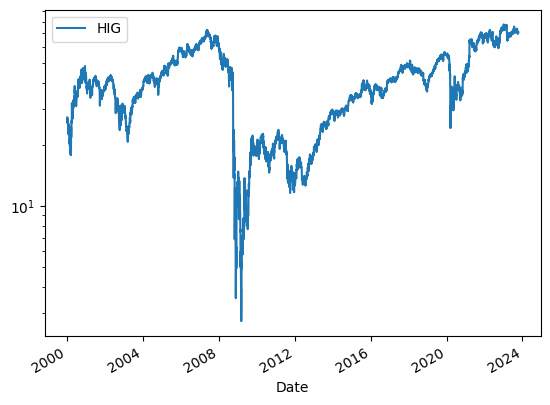

In [10]:
txt=np.log(df2y).diff(1)
df2y[txt.any()[(np.abs(txt)>0.7).any()].index].plot()
plt.yscale('log')

In [11]:
df2=df2y[list(m6u.symbol)]#[:'2022-04-29']
df2=df2.reindex(pd.bdate_range(start=df2.index[0], end=df2.index[-1], freq="C", weekmask="Mon Tue Wed Thu Fri")).fillna(method='ffill')#.fillna(method='bfill')

In [12]:
lag=20
qf=1+np.log(df2).diff(lag)[-lag*((len(df2)-1)//lag-1)-1::].apply(lambda x: pd.qcut(x, 5, duplicates='drop',labels=False), axis=1)
qf

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLF,XLV,XLE,XLY,XLI,XLC,XLU,XLP,XLB,VXX
2000-02-04,NaN,NaN,4.0,NaN,NaN,5.0,NaN,5.0,3.0,1.0,...,3.0,5.0,2.0,1.0,2.0,NaN,3.0,2.0,1.0,NaN
2000-02-07,NaN,NaN,4.0,NaN,NaN,5.0,NaN,5.0,3.0,1.0,...,4.0,2.0,3.0,1.0,1.0,NaN,3.0,2.0,1.0,NaN
2000-02-08,NaN,NaN,4.0,NaN,NaN,5.0,NaN,5.0,3.0,1.0,...,4.0,3.0,2.0,2.0,1.0,NaN,4.0,3.0,1.0,NaN
2000-02-09,NaN,NaN,3.0,NaN,NaN,5.0,NaN,5.0,3.0,1.0,...,3.0,4.0,2.0,2.0,2.0,NaN,4.0,2.0,1.0,NaN
2000-02-10,NaN,NaN,3.0,NaN,NaN,5.0,NaN,5.0,4.0,1.0,...,2.0,3.0,3.0,2.0,1.0,NaN,4.0,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-09,5.0,2.0,2.0,5.0,3.0,2.0,2.0,1.0,4.0,5.0,...,3.0,4.0,4.0,1.0,3.0,4.0,1.0,1.0,2.0,5.0
2023-10-10,4.0,4.0,2.0,5.0,4.0,3.0,1.0,1.0,2.0,5.0,...,2.0,4.0,2.0,1.0,3.0,5.0,1.0,1.0,2.0,5.0
2023-10-11,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,4.0,5.0,...,2.0,3.0,2.0,1.0,4.0,5.0,1.0,1.0,2.0,5.0
2023-10-12,3.0,3.0,1.0,5.0,4.0,5.0,1.0,1.0,3.0,5.0,...,2.0,3.0,2.0,1.0,3.0,4.0,1.0,1.0,2.0,5.0


In [13]:
etfs,stocks=[list(m6u[m6u['class']==['ETF','Stock'][i]].symbol) for i in (0,1)]
etfs.remove('VXX')
vari=['VXX',]
stocks.remove('DRE')
vari2=['DRE',]
len(etfs+stocks+vari+vari2)

100

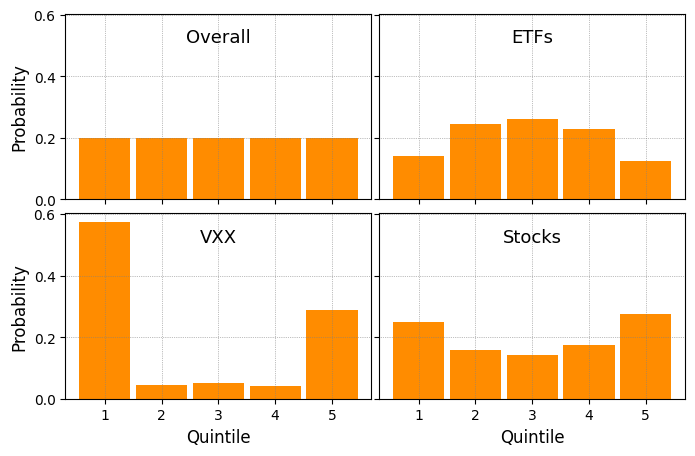

In [14]:
fig = plt.figure(figsize=(8, 5))
gs = fig.add_gridspec(2,2, hspace=0.075, wspace=0.025)
axs = gs.subplots(sharex=True, sharey=True)
ii=0
labels=['Overall','ETFs','VXX','Stocks']
for val in [etfs+vari+stocks+vari2,etfs,vari,stocks]:
    axs[ii//2][ii%2].hist(qf['2022':][val].values.flatten(),bins=[0.5,1.5,2.5,3.5,4.5,5.5], rwidth=0.9, density=True, color='darkorange');
    if ii//2==1:
        axs[ii//2][ii%2].set_xlabel('Quintile', size=12)
    if ii%2==0:
        axs[ii//2][ii%2].set_ylabel('Probability', size=12)
    axs[ii//2][ii%2].grid(c='grey', ls=':', lw=0.5)
    axs[ii//2][ii%2].set_title(labels[ii],y=0.8, size=13)
    ii=ii+1
for ex in ['.pdf', '.svg', '.png']:
    plt.savefig(f'fig1'+ex, transparent=True, bbox_inches='tight')
plt.show()


In [15]:
def q_dists(x):
    xi=x.dropna().astype(int)
    if len(xi)==0:
        return np.array([0.2, 0.4, 0.6, 0.8, 1. ])
    #print(xi)
    r=np.array([(xi==i).sum() for i in range(1,6)])
    #print(r.cumsum())
    return r.cumsum()/r.sum()

q_dists(qf.ABBV)


array([0.25349087, 0.39491586, 0.50483351, 0.67883996, 1.        ])

In [16]:
last13=0*(10+3)+2*(13+6*10)
step6=6

In [17]:
def desum(x):
    x[1:]=x[1:].values-x[:-1].values
    return x

resq=[]
resqg=[]
lastd=[]
for av in (1,0,0.5):
  for res,j in [([qf[-lag-j-50*lag:len(qf)-lag-j][i].apply(q_dists,axis=0).mean(axis=1)
                for i,ii in ((etfs,50),(stocks,50),(vari,50),(vari2,50))],j) for j in lag*np.arange(-1,last13-1)]:
    
    lastd.append(qf.index[:len(qf)-lag-j][-1])
    
    qfg=((1-av)*qf[-lag-j-1:len(qf)-lag-j].apply(lambda x: res[0] if x.name in etfs
                                              else res[1] if x.name in stocks 
                                              else res[2] if x.name in vari
                                              else 1*np.array([0.2,0.4,0.6,0.8,1])+0*res[3],axis=0).values
         +av*0.2*qf[-lag-j-5*lag:len(qf)-lag-j].apply(q_dists,axis=0).values
         +av*0.2*qf[-lag-j-10*lag:len(qf)-lag-j].apply(q_dists,axis=0).values
         #+av*0.2*qf[-lag-j-20*lag:len(qf)-lag-j].apply(q_dists,axis=0).values
         #+av*0.2*qf[-lag-j-200*lag:len(qf)-lag-j].apply(q_dists,axis=0).values
         +av*0.6*qf[-lag-j-400*lag:len(qf)-lag-j].apply(q_dists,axis=0).values)
    
    resq.append(np.nanmean((qf[-1-j:len(qf)-j].apply(q_dists,axis=0).values-qfg)**2))
    resqg.append(pd.DataFrame(qfg.copy(),columns=qf.columns).apply(desum,axis=0))
    print(lastd[-1], resq[-1])
               
print('\n',np.mean(resq[1:]),np.mean(resq[1:])+np.std(resq[1:]))

2023-10-13 00:00:00 0.002164778235568848
2023-09-15 00:00:00 0.15666119185641736
2023-08-18 00:00:00 0.1464672868687882
2023-07-21 00:00:00 0.15669281721088824
2023-06-23 00:00:00 0.15417181617326037
2023-05-26 00:00:00 0.1544630946050658
2023-04-28 00:00:00 0.15531709201357888
2023-03-31 00:00:00 0.1565692461179923
2023-03-03 00:00:00 0.1725873190611496
2023-02-03 00:00:00 0.14842398042459284
2023-01-06 00:00:00 0.1705070258978833
2022-12-09 00:00:00 0.15723659747463908
2022-11-11 00:00:00 0.16045536287391934
2022-10-14 00:00:00 0.16346699346543955
2022-09-16 00:00:00 0.15594629250263298
2022-08-19 00:00:00 0.1617846381518919
2022-07-22 00:00:00 0.14835237327739076
2022-06-24 00:00:00 0.1594783676304009
2022-05-27 00:00:00 0.15851391598820913
2022-04-29 00:00:00 0.15601843342937405
2022-04-01 00:00:00 0.16192854791039196
2022-03-04 00:00:00 0.1524517905802922
2022-02-04 00:00:00 0.15894867937175525
2022-01-07 00:00:00 0.16870624113746988
2021-12-10 00:00:00 0.16001479458666107
2021-11

In [18]:
lldd=len(lastd)//3

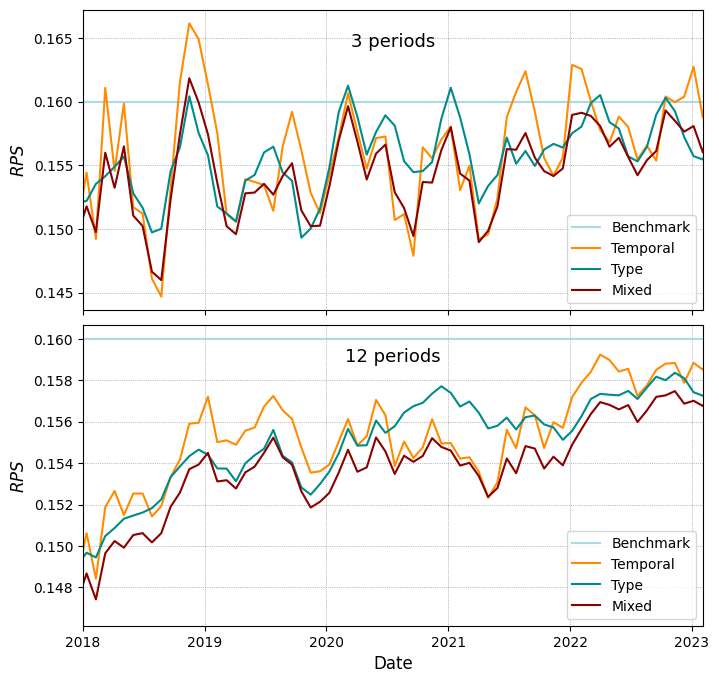

In [19]:
labels=['Benchmark','Temporal','Type','Mixed']
colors=['lightblue','darkorange','darkcyan','darkred']
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, hspace=0.05)
axs = gs.subplots(sharex=True, sharey=False)
jj=0
for pers in (3,12,):
    #plt.figure(figsize=(8,4))
    ii=0
    tplt=lastd[1:78]
    axs[jj].plot(tplt,0.16*np.ones_like(tplt),color=colors[ii],label=labels[ii])
    ii=ii+1
    for j in range(3):
        tplt=lastd[j*lldd+1:j*lldd+78]
        rplt=[np.mean(resq[j*lldd+1+i:j*lldd+1+i+pers]) for i in range(len(tplt))]
        axs[jj].plot(tplt, rplt, color=colors[ii], label=labels[ii])
        ii=ii+1
        #plt.plot(tplt, resq[1:1+len(tplt)])
    axs[jj].xaxis.set_major_formatter(mdates.ConciseDateFormatter(plt.gca().xaxis.get_major_locator()))
    axs[jj].grid(c='grey', ls=':', lw=0.5)
    axs[jj].legend()
    axs[jj].set_ylabel(f'$RPS$', size=12)
    axs[jj].set_title(f'{pers} periods',y=0.85, size=13)
    if jj==1:
        axs[jj].set_xlabel('Date', size=12)
    axs[jj].set_xlim(pd.to_datetime('2018'),pd.to_datetime('2023-2-3'))
    jj=jj+1
for ex in ['.pdf', '.svg', '.png']:
    plt.savefig(f'fig2'+ex, transparent=True, bbox_inches='tight')
plt.show()



In [20]:
last13=0*(10+3)+2*(13+6*10)
def compute(av=0,a3=0):
    lag=20
    total=[]
    totr=[]
    totd=[]
    resm=[]
    lastd=[]
    for jj in range(0,last13):
        lastd.append(df2.index[:len(df2)-jj*lag][-1])
        #print(str(lastd[-1])[:10])
        res=np.log((df2/df2.shift(1)))[-jj*lag-120:len(df2)-jj*lag].mean(axis=0)
        res2=np.log((df2/df2.shift(1)))[-jj*lag-40:len(df2)-jj*lag].mean(axis=0)

        tik=((res).rank()>50)&((res2).rank()<=85)
        tik=[i for i in res[tik].index if i in stocks]# and i not in rtxt]
        norm=np.abs(np.sign(res[tik])).sum()

        W1=(1/norm)*np.array([1 if i in tik else 0 for i in df2.columns])


        W3=(lambda x: x/x.sum())(np.array([a3 if i in stocks+vari2 else 1-a3
                                           for i in df2.columns ]))

        MM=(df2/df2.shift(1))[-jj*lag:len(df2)-(jj-1)*lag]-1
        Wf=(lambda x: x/np.abs(x).sum())((W1*(1.0-np.abs(av))+av*W3))
        resm.append(pd.DataFrame([Wf],columns=df2.columns))
        retM=(Wf*MM).sum(axis=1)
        #print(1+retM)
        ret=np.log(1+retM)
        ir=ret.sum()/ret.std()
        #print(jj,ir,norm,len(retM))
        total.append(ir)
        totr.append(ret.sum())
        totd.append(ret.var())
    return lastd, total, totr, totd
lastd, total, totr, totd = compute(1)
#print(np.sum(total[1:]),np.exp(np.sum(totr[1:])), np.sum(totr[1:])/np.sum(totd[1:])**0.5 )
#print()


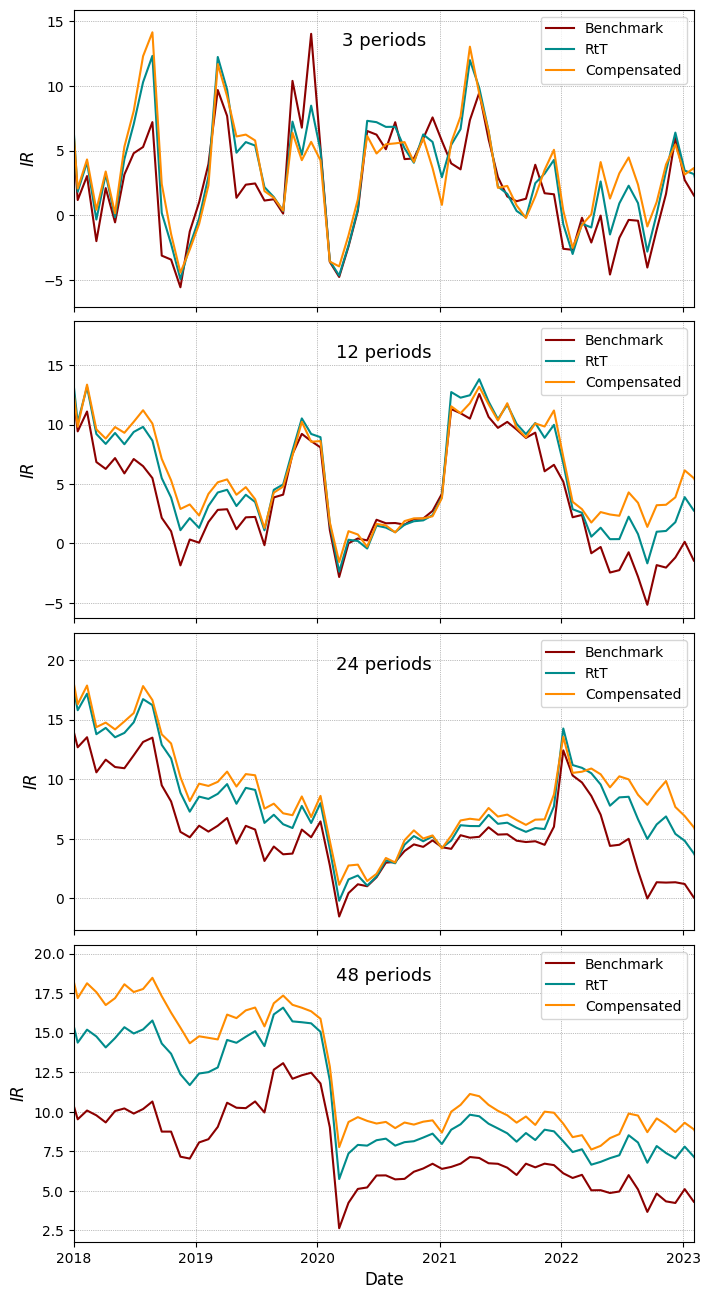

In [21]:
labels=['Benchmark','RtT','Compensated','Stocks','ETFs']
colors=['darkred','darkcyan','darkorange','grey','darkmagenta']
fig = plt.figure(figsize=(8, 16))
gs = fig.add_gridspec(4, hspace=0.05)
axs = gs.subplots(sharex=True, sharey=False)
jj=0
for step6 in (12//4,12,12*2,12*4):
    #plt.figure(figsize=(8,4))
    ii=0
    for av,a3 in [(1,0.5),(0,0),(-1/3,0.0),(1,1),(1,0)][:3]:
        lastd, total, totr, totd = compute(av,a3)
        datv=[lastd[i] for i in range(1,last13-step6)]
        irv=[np.sum(totr[i:i+step6])/np.sum(totd[i:i+step6])**0.5 for i in range(1,last13-step6)]
        axs[jj].plot(datv,irv, color=colors[ii], label=labels[ii])
        ii+=1
    axs[jj].xaxis.set_major_formatter(mdates.ConciseDateFormatter(plt.gca().xaxis.get_major_locator()))
    axs[jj].grid(c='grey', ls=':', lw=0.5)
    axs[jj].legend()
    axs[jj].set_ylabel(f'$IR$', size=12)
    axs[jj].set_title(f'{step6} periods',y=0.85, size=13)
    if jj==3:
        axs[jj].set_xlabel('Date', size=12)
    axs[jj].set_xlim(pd.to_datetime('2018'),pd.to_datetime('2023-2-3'))
    jj=jj+1
#for ex in ['.pdf', '.svg', '.png']:
#    plt.savefig(f'fig2_{step6}'+ex, transparent=True, bbox_inches='tight')
for ex in ['.pdf', '.svg', '.png']:
    plt.savefig(f'fig3'+ex, transparent=True, bbox_inches='tight')
plt.show()


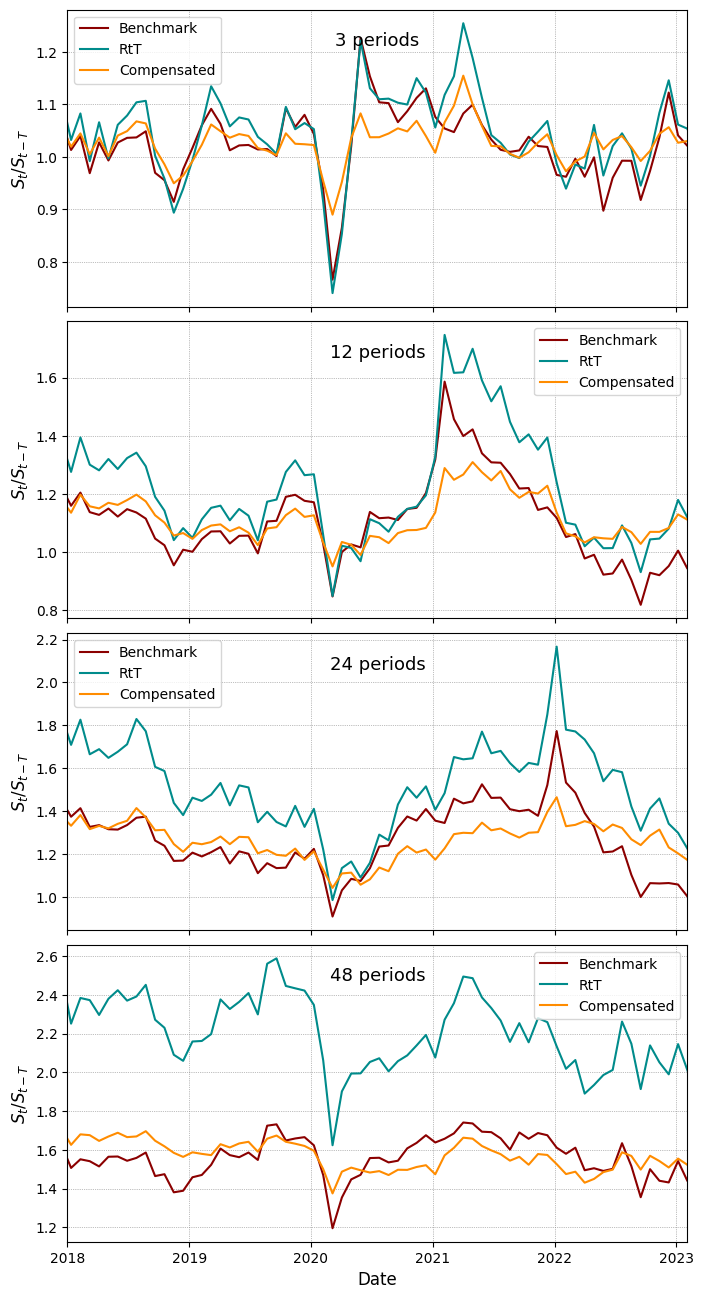

In [22]:
labels=['Benchmark','RtT','Compensated','Stocks','ETFs']
colors=['darkred','darkcyan','darkorange','grey','darkmagenta']
fig = plt.figure(figsize=(8, 16))
gs = fig.add_gridspec(4, hspace=0.05)
axs = gs.subplots(sharex=True, sharey=False)
jj=0
for step6 in (12//4,12,12*2,12*4):
    #plt.figure(figsize=(8,4))
    ii=0
    for av,a3 in [(1,0.5),(0,0),(-1/3,0.0),(1,1),(1,0)][:3]:
        lastd, total, totr, totd = compute(av,a3)
        datv=[lastd[i] for i in range(1,last13-step6)]
        ret=[np.exp(np.sum(totr[i:i+step6])) for i in range(1,last13-step6)]
        axs[jj].plot(datv,ret, color=colors[ii], label=labels[ii])
        ii+=1
    axs[jj].xaxis.set_major_formatter(mdates.ConciseDateFormatter(plt.gca().xaxis.get_major_locator()))
    axs[jj].grid(c='grey', ls=':', lw=0.5)
    axs[jj].legend()
    axs[jj].set_ylabel('$S_t/S_{t-T}$', size=12)
    axs[jj].set_title(f'{step6} periods',y=0.85, size=13)
    if jj==3:
        axs[jj].set_xlabel('Date', size=12)
    axs[jj].set_xlim(pd.to_datetime('2018'),pd.to_datetime('2023-2-3'))
    jj=jj+1
#for ex in ['.pdf', '.svg', '.png']:
#    plt.savefig(f'fig2_{step6}'+ex, transparent=True, bbox_inches='tight')
for ex in ['.pdf', '.svg', '.png']:
    plt.savefig(f'fig4'+ex, transparent=True, bbox_inches='tight')
plt.show()
